In [38]:
import torch
import torchvision

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

from torchvision import datasets, transforms
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=64, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=64, shuffle=True, **kwargs)
print(len(test_loader) + len(train_loader))

1095


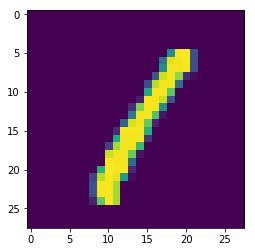

In [39]:
from matplotlib import pyplot as plt

plt.imshow(train_loader.dataset.train_data[3])
plt.pause(0.001)

In [41]:
import torch.nn as nn
import torch.nn.functional as f

class mnist_classifier_net(nn.Module):
    def __init__(self):
        super(mnist_classifier_net,self).__init__()
        self.conv1 = nn.Conv2d(1,10,5)
        self.conv2 = nn.Conv2d(10,20,5)
        self.drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self,x):
        x = f.relu(f.max_pool2d(self.conv1(x),2))
        x = f.relu(f.max_pool2d(self.drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = f.relu(self.fc1(x))
        x = f.dropout(x, training=self.training)
        x = f.log_softmax(self.fc2(x))#,dim =1)
        return x
    
model = mnist_classifier_net().to(device)

In [42]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum =0.5)

In [45]:
def train(train_loader, device, model, optimizer, epoch, log_interval):
    model.train()
    for i_batch, (data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = f.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if i_batch % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i_batch * len(data), len(train_loader.dataset),
                100. * i_batch / len(train_loader), loss.item()))
        
def test(test_loader,device,model):
    model.eval()
    test_loss = 0
    correct =0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += f.nll_loss(output, target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [46]:
num_epochs = 10
for epoch in range(num_epochs):
    train(train_loader, device, model, optimizer, epoch, log_interval)
    test(test_loader,device,model)

/users/prateek.s/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 [0/60000 (0%)]	Loss: 0.359180
Train Epoch: 0 [640/60000 (1%)]	Loss: 0.141011
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.122730
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.358760
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.154202
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.169917
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.078761
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.220669
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.060474
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.273219
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.042170
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.214116
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.200975
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.274065
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.219337
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.213249
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.128862
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.136205
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.186598
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.145686
Train Epoch: 0 [12800/60000 (

Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.116488
Train Epoch: 1 [45440/60000 (76%)]	Loss: 0.054975
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.180950
Train Epoch: 1 [46720/60000 (78%)]	Loss: 0.265903
Train Epoch: 1 [47360/60000 (79%)]	Loss: 0.240508
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.091841
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.107220
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.189415
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.186787
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.190156
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.260374
Train Epoch: 1 [51840/60000 (86%)]	Loss: 0.062418
Train Epoch: 1 [52480/60000 (87%)]	Loss: 0.381574
Train Epoch: 1 [53120/60000 (88%)]	Loss: 0.072076
Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.305574
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.129692
Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.146389
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.075480
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.134656
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.101178


Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.185642
Train Epoch: 3 [29440/60000 (49%)]	Loss: 0.060901
Train Epoch: 3 [30080/60000 (50%)]	Loss: 0.103643
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.170239
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.210588
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.104000
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.142391
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.266159
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.110800
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.205016
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.272178
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.084652
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.199688
Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.153728
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.375453
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.104775
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.064816
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.020167
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.220466
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.162278


Train Epoch: 5 [13440/60000 (22%)]	Loss: 0.066885
Train Epoch: 5 [14080/60000 (23%)]	Loss: 0.091812
Train Epoch: 5 [14720/60000 (25%)]	Loss: 0.287702
Train Epoch: 5 [15360/60000 (26%)]	Loss: 0.227621
Train Epoch: 5 [16000/60000 (27%)]	Loss: 0.091637
Train Epoch: 5 [16640/60000 (28%)]	Loss: 0.108417
Train Epoch: 5 [17280/60000 (29%)]	Loss: 0.271463
Train Epoch: 5 [17920/60000 (30%)]	Loss: 0.139327
Train Epoch: 5 [18560/60000 (31%)]	Loss: 0.084780
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.111842
Train Epoch: 5 [19840/60000 (33%)]	Loss: 0.128982
Train Epoch: 5 [20480/60000 (34%)]	Loss: 0.107422
Train Epoch: 5 [21120/60000 (35%)]	Loss: 0.112723
Train Epoch: 5 [21760/60000 (36%)]	Loss: 0.060147
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.063519
Train Epoch: 5 [23040/60000 (38%)]	Loss: 0.189714
Train Epoch: 5 [23680/60000 (39%)]	Loss: 0.156751
Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.088094
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.133919
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.205267


Train Epoch: 6 [58240/60000 (97%)]	Loss: 0.146648
Train Epoch: 6 [58880/60000 (98%)]	Loss: 0.070156
Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.098751

Test set: Average loss: 0.0007, Accuracy: 9859/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.064096
Train Epoch: 7 [640/60000 (1%)]	Loss: 0.147777
Train Epoch: 7 [1280/60000 (2%)]	Loss: 0.205469
Train Epoch: 7 [1920/60000 (3%)]	Loss: 0.192145
Train Epoch: 7 [2560/60000 (4%)]	Loss: 0.104238
Train Epoch: 7 [3200/60000 (5%)]	Loss: 0.158377
Train Epoch: 7 [3840/60000 (6%)]	Loss: 0.152927
Train Epoch: 7 [4480/60000 (7%)]	Loss: 0.107802
Train Epoch: 7 [5120/60000 (9%)]	Loss: 0.109944
Train Epoch: 7 [5760/60000 (10%)]	Loss: 0.105661
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.160450
Train Epoch: 7 [7040/60000 (12%)]	Loss: 0.040987
Train Epoch: 7 [7680/60000 (13%)]	Loss: 0.095686
Train Epoch: 7 [8320/60000 (14%)]	Loss: 0.118578
Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.210410
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.064136
Train Epoch: 7 [10

Train Epoch: 8 [42240/60000 (70%)]	Loss: 0.200049
Train Epoch: 8 [42880/60000 (71%)]	Loss: 0.060553
Train Epoch: 8 [43520/60000 (72%)]	Loss: 0.246978
Train Epoch: 8 [44160/60000 (74%)]	Loss: 0.315018
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.150424
Train Epoch: 8 [45440/60000 (76%)]	Loss: 0.032394
Train Epoch: 8 [46080/60000 (77%)]	Loss: 0.103730
Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.173332
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.304319
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.151350
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.199585
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.113644
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.235434
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.056319
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.085834
Train Epoch: 8 [51840/60000 (86%)]	Loss: 0.090769
Train Epoch: 8 [52480/60000 (87%)]	Loss: 0.073217
Train Epoch: 8 [53120/60000 (88%)]	Loss: 0.144534
Train Epoch: 8 [53760/60000 (90%)]	Loss: 0.148992
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.216481
